import libraries

---



In [ ]:
# Import data manipulation libraries
import pandas as pd

# Import visualization library like matplotlib
import matplotlib.pyplot as plt

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

from google.colab import drive


resizing images and using kmeans cluster to get the major colors
--

---



Mounted at /content/drive


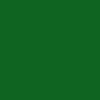

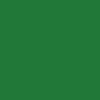

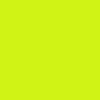

In [ ]:

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')   #uncomment line to allow google notebooks to access google drive on my device

# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/my_image4.jpg')  # Replace 'your_image.jpg' with your image file path

#Resize the image to a smaller size (e.g., 300x300)
resized_image = cv2.resize(image,(300, 300))

# Convert the resized image to RGB (OpenCV loads images in BGR format)
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Flatten the image to a 2D array of RGB values
pixels = resized_image_rgb.reshape((-1, 3))

# Specify the number of clusters (3 in your case)
num_clusters = 3

# Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=num_clusters, n_init=15)  # You can adjust the value as needed

# Fit the KMeans model to the pixels
kmeans.fit(pixels)

# Get the RGB values of the cluster centers
cluster_centers = kmeans.cluster_centers_.astype(int)

# Sort the cluster centers by luminance (optional)
sorted_centers = sorted(cluster_centers, key=lambda c: 0.299 * c[0] + 0.587 * c[1] + 0.114 * c[2])

# Extract the dominant colors
dominant_colors = sorted_centers[:num_clusters]

# Display the dominant colors
for color in dominant_colors:
    color_image = np.zeros((100, 100, 3), dtype=np.uint8)
    color_image[:, :, :] = color
    cv2_imshow(color_image)


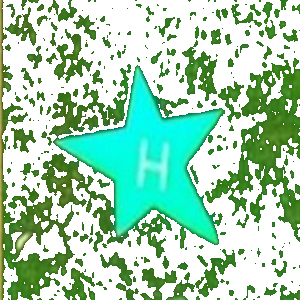

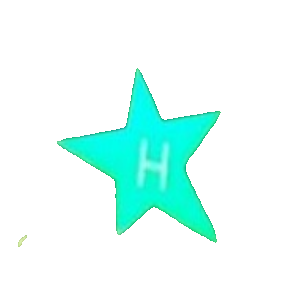

True

In [ ]:
    # Get the RGB values of the cluster centers
    cluster_centers = kmeans.cluster_centers_.astype(int)

    # Calculate the cluster sizes
    cluster_sizes = np.bincount(kmeans.labels_)

    # Find the index of the largest cluster
    largest_cluster_index = np.argmax(cluster_sizes[0:])

    # Extract the most dominant color
    most_dominant_color = cluster_centers[largest_cluster_index]

    largest_cluster_mask = kmeans.labels_ == largest_cluster_index

     # Create a mask for the most dominant color
    mask = np.all(resized_image_rgb == most_dominant_color, axis=-1)

    # Create a copy of the original image
    filtered_image = resized_image.copy()
    filtered_image[largest_cluster_mask.reshape(resized_image.shape[:2])] = [255, 255, 255]  # Set to white

    # Display the filtered image using cv2_imshow
    cv2_imshow(filtered_image)  # Use cv2_imshow for displaying in Colab
#####
##### repeating the process but adding a threshhold or tolerance range to the color we filter out

    # Define a tolerance threshold for similar colors
    tolerance = 50  # You can adjust this threshold as needed

    # Create a mask for colors similar to the most dominant color
    color_mask = np.linalg.norm(cluster_centers - most_dominant_color, axis=1) <= tolerance

    # Reshape the color mask to match the original image dimensions
    color_mask = color_mask[kmeans.labels_]

    # Apply the color mask to remove similar colors from the image
    filtered_image1 = resized_image.copy()
    filtered_image1[color_mask.reshape(resized_image.shape[:2])] = [255, 255, 255]  # Set to white

    # Display the filtered image using cv2_imshow
    cv2_imshow(filtered_image1)  # Use cv2_imshow for displaying in Colab
    cv2.imwrite("result.jpg",filtered_image1)
#####



identify the object of interest by implementing a yolov8 object detection algo rithm and training it on shape dectection data and get that bounding box
--
---





importing the needed stuff

--



In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

from IPython.display import display, Image

import os
HOME = os.getcwd()
print(HOME)



Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


/content


instantiate the model and get the dataset and train it on the dataset

--
dataset from this resource
 https://universe.roboflow.com/youssef-mohamed-dylvh/shape-detector-gbqpp/dataset/3


In [ ]:
#make an instance of the model
model = YOLO(f'{HOME}/yolov8n.pt')

#make a new directory to keep in it the datsets
!mkdir {HOME}/datasets
%cd {HOME}/datasets

##code snippet from the roboflow website to use the wanted dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PWjsHPiaJZNERK1i8R39")
project = rf.workspace("youssef-mohamed-dylvh").project("shape-detector-gbqpp")
dataset = project.version(3).download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to shape-detector-3 in yolov8:: 100%|██████████| 352/352 [00:00<00:00, 1610.02it/s]


In [ ]:
##train the model on the given dataset
# Use the model
model.train(data=f'{HOME}/datasets/shape-detector-3/data.yaml', epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set



Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/shape-detector-3/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, 

In [ ]:
model.predict('result.jpg', save=True, conf=0.5,show= True)
result = model('result.jpg') # Display preds. Accepts all YOLO predict arguments

boxes = result.boxes.numpy()

xyxy = boxes.xyxy #get the xy coordinates of the bounding box

#draw the bounding box
cv2.rectangle('result.jpg', (int(xyxy[0]),int(xyxy[0]),int(xyxy[0]),int(xyxy[0])),(0,255,0))
cv2_imshow('result.jpg')

